In [1]:
# Importação de bibliotecas
import pandas as pd
import numpy as np

# bibliotecas graficas
import matplotlib.pyplot as plt
import seaborn as sns

# Avisos
import warnings
warnings.filterwarnings('ignore')

# Configurações Pandas
pd.set_option('display.max_rows',200)
pd.set_option('display.max_columns',100)

# Configurações Matplotlib
# Tamanho padrão dos graficos
plt.rcParams['figure.figsize'] = (15, 6)

# Configuração de Estilo
plt.style.use('seaborn-darkgrid')

### **Exploração de Dados**

In [ ]:
# Pergunta em aberto........
# Quanto vale o aluguel da sua casa ?

In [2]:
# Lendo dados
df = pd.read_csv('house_data.csv')

In [3]:
# Dimensões da base
df.shape

(10692, 13)

In [6]:
'''
city - Cidade
area - Tamanho em M²
rooms - quantidade de quartos
bathroom - quantidade de banheiros
parking spaces - quantidade de vagas de garagem
floor - Qual o andar está o imovel
animal - Se aceita ou não animais
furniture - Se está mobiliado
hoa - Valor de Condominio
rent amount - Valor do Aluguel
property tax - Valor do IPTU
fire insurance - Valor do seguro de incendio
total - Valor total
'''
df.head()

,city,area,rooms,bathroom,parking spaces,floor,animal,furniture,hoa (R$),rent amount (R$),property tax (R$),fire insurance (R$),total (R$)
0,São Paulo,70,2,1,1,7,acept,furnished,2065,3300,211,42,5618
1,São Paulo,320,4,4,0,20,acept,not furnished,1200,4960,1750,63,7973
2,Porto Alegre,80,1,1,1,6,acept,not furnished,1000,2800,0,41,3841
3,Porto Alegre,51,2,1,0,2,acept,not furnished,270,1112,22,17,1421
4,São Paulo,25,1,1,0,1,not acept,not furnished,0,800,25,11,836


In [7]:
df.columns

Index(['city', 'area', 'rooms', 'bathroom', 'parking spaces', 'floor',
       'animal', 'furniture', 'hoa (R$)', 'rent amount (R$)',
       'property tax (R$)', 'fire insurance (R$)', 'total (R$)'],
      dtype='object')

In [103]:
# 1º Modificação - Exclusão de duas colunas
df_1 = df.drop(columns=['fire insurance (R$)','total (R$)'])

In [104]:
df_1.head()

,city,area,rooms,bathroom,parking spaces,floor,animal,furniture,hoa (R$),rent amount (R$),property tax (R$)
0,São Paulo,70,2,1,1,7,acept,furnished,2065,3300,211
1,São Paulo,320,4,4,0,20,acept,not furnished,1200,4960,1750
2,Porto Alegre,80,1,1,1,6,acept,not furnished,1000,2800,0
3,Porto Alegre,51,2,1,0,2,acept,not furnished,270,1112,22
4,São Paulo,25,1,1,0,1,not acept,not furnished,0,800,25


In [105]:
# Verificando se existe algum valor null.
df_1.isnull().sum()

city                 0
area                 0
rooms                0
bathroom             0
parking spaces       0
floor                0
animal               0
furniture            0
hoa (R$)             0
rent amount (R$)     0
property tax (R$)    0
dtype: int64

In [106]:
# Campos unicos
df_1.nunique()

city                    5
area                  517
rooms                  11
bathroom               10
parking spaces         11
floor                  35
animal                  2
furniture               2
hoa (R$)             1679
rent amount (R$)     1195
property tax (R$)    1243
dtype: int64

In [107]:
# Tipos das colunas - 1º
df_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10692 entries, 0 to 10691
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   city               10692 non-null  object
 1   area               10692 non-null  int64 
 2   rooms              10692 non-null  int64 
 3   bathroom           10692 non-null  int64 
 4   parking spaces     10692 non-null  int64 
 5   floor              10692 non-null  object
 6   animal             10692 non-null  object
 7   furniture          10692 non-null  object
 8   hoa (R$)           10692 non-null  int64 
 9   rent amount (R$)   10692 non-null  int64 
 10  property tax (R$)  10692 non-null  int64 
dtypes: int64(7), object(4)
memory usage: 919.0+ KB


In [108]:
# Tipos das colunas - 2º
df_1.dtypes
#.value_counts()

city                 object
area                  int64
rooms                 int64
bathroom              int64
parking spaces        int64
floor                object
animal               object
furniture            object
hoa (R$)              int64
rent amount (R$)      int64
property tax (R$)     int64
dtype: object

### **Exploração Analitica - EDA**

In [109]:
# Filtrar os tipos de colunas
# Segregar os tipos pois elas diferem a forma de analise - Quantitativa e Qualitativa

In [110]:
colunas_categoricas = df_1.columns[df_1.dtypes == object]
colunas_numericas = df_1.columns[df_1.dtypes != object]

In [111]:
colunas_categoricas, colunas_numericas

(Index(['city', 'floor', 'animal', 'furniture'], dtype='object'),
 Index(['area', 'rooms', 'bathroom', 'parking spaces', 'hoa (R$)',
        'rent amount (R$)', 'property tax (R$)'],
       dtype='object'))

In [112]:
# Analise dos Campos Objeto

df_1['city'].value_counts(normalize=True) * 100 

São Paulo         55.059858
Rio de Janeiro    14.038533
Belo Horizonte    11.765806
Porto Alegre      11.157875
Campinas           7.977927
Name: city, dtype: float64

In [113]:
for coluna in colunas_categoricas:
    analise = df_1[coluna].value_counts(normalize=True) * 100
    print(coluna)
    print(analise)
    print('')

city
São Paulo         55.059858
Rio de Janeiro    14.038533
Belo Horizonte    11.765806
Porto Alegre      11.157875
Campinas           7.977927
Name: city, dtype: float64

floor
-      23.017209
1      10.110363
2       9.212495
3       8.707445
4       6.995885
5       5.611672
6       5.041152
7       4.648335
8       4.582866
9       3.451178
10      3.338945
11      2.833895
12      2.403666
13      1.870557
14      1.589974
15      1.374860
16      1.019454
17      0.897868
18      0.701459
19      0.495698
20      0.411523
21      0.392817
25      0.233820
23      0.233820
22      0.224467
26      0.187056
24      0.177703
27      0.074822
28      0.056117
29      0.046764
32      0.018706
35      0.009353
46      0.009353
301     0.009353
51      0.009353
Name: floor, dtype: float64

animal
acept        77.777778
not acept    22.222222
Name: animal, dtype: float64

furniture
not furnished    75.626637
furnished        24.373363
Name: furniture, dtype: float64



In [114]:
# Correção nos dados

# Ajustando o andar
# Localizando o andar errado
df_1.loc[df_1['floor'] == 30]
df_1.iloc[2562, 5] = '30'

# Trocando o caracter '-' para 0
df_1['floor'] = df_1['floor'].apply(lambda x: 0 if x == '-' else x)

# Passando a coluna Andar de Objeto para Numerica
df_1['floor'] = pd.to_numeric(df_1['floor'])

In [115]:
df_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10692 entries, 0 to 10691
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   city               10692 non-null  object
 1   area               10692 non-null  int64 
 2   rooms              10692 non-null  int64 
 3   bathroom           10692 non-null  int64 
 4   parking spaces     10692 non-null  int64 
 5   floor              10692 non-null  int64 
 6   animal             10692 non-null  object
 7   furniture          10692 non-null  object
 8   hoa (R$)           10692 non-null  int64 
 9   rent amount (R$)   10692 non-null  int64 
 10  property tax (R$)  10692 non-null  int64 
dtypes: int64(8), object(3)
memory usage: 919.0+ KB


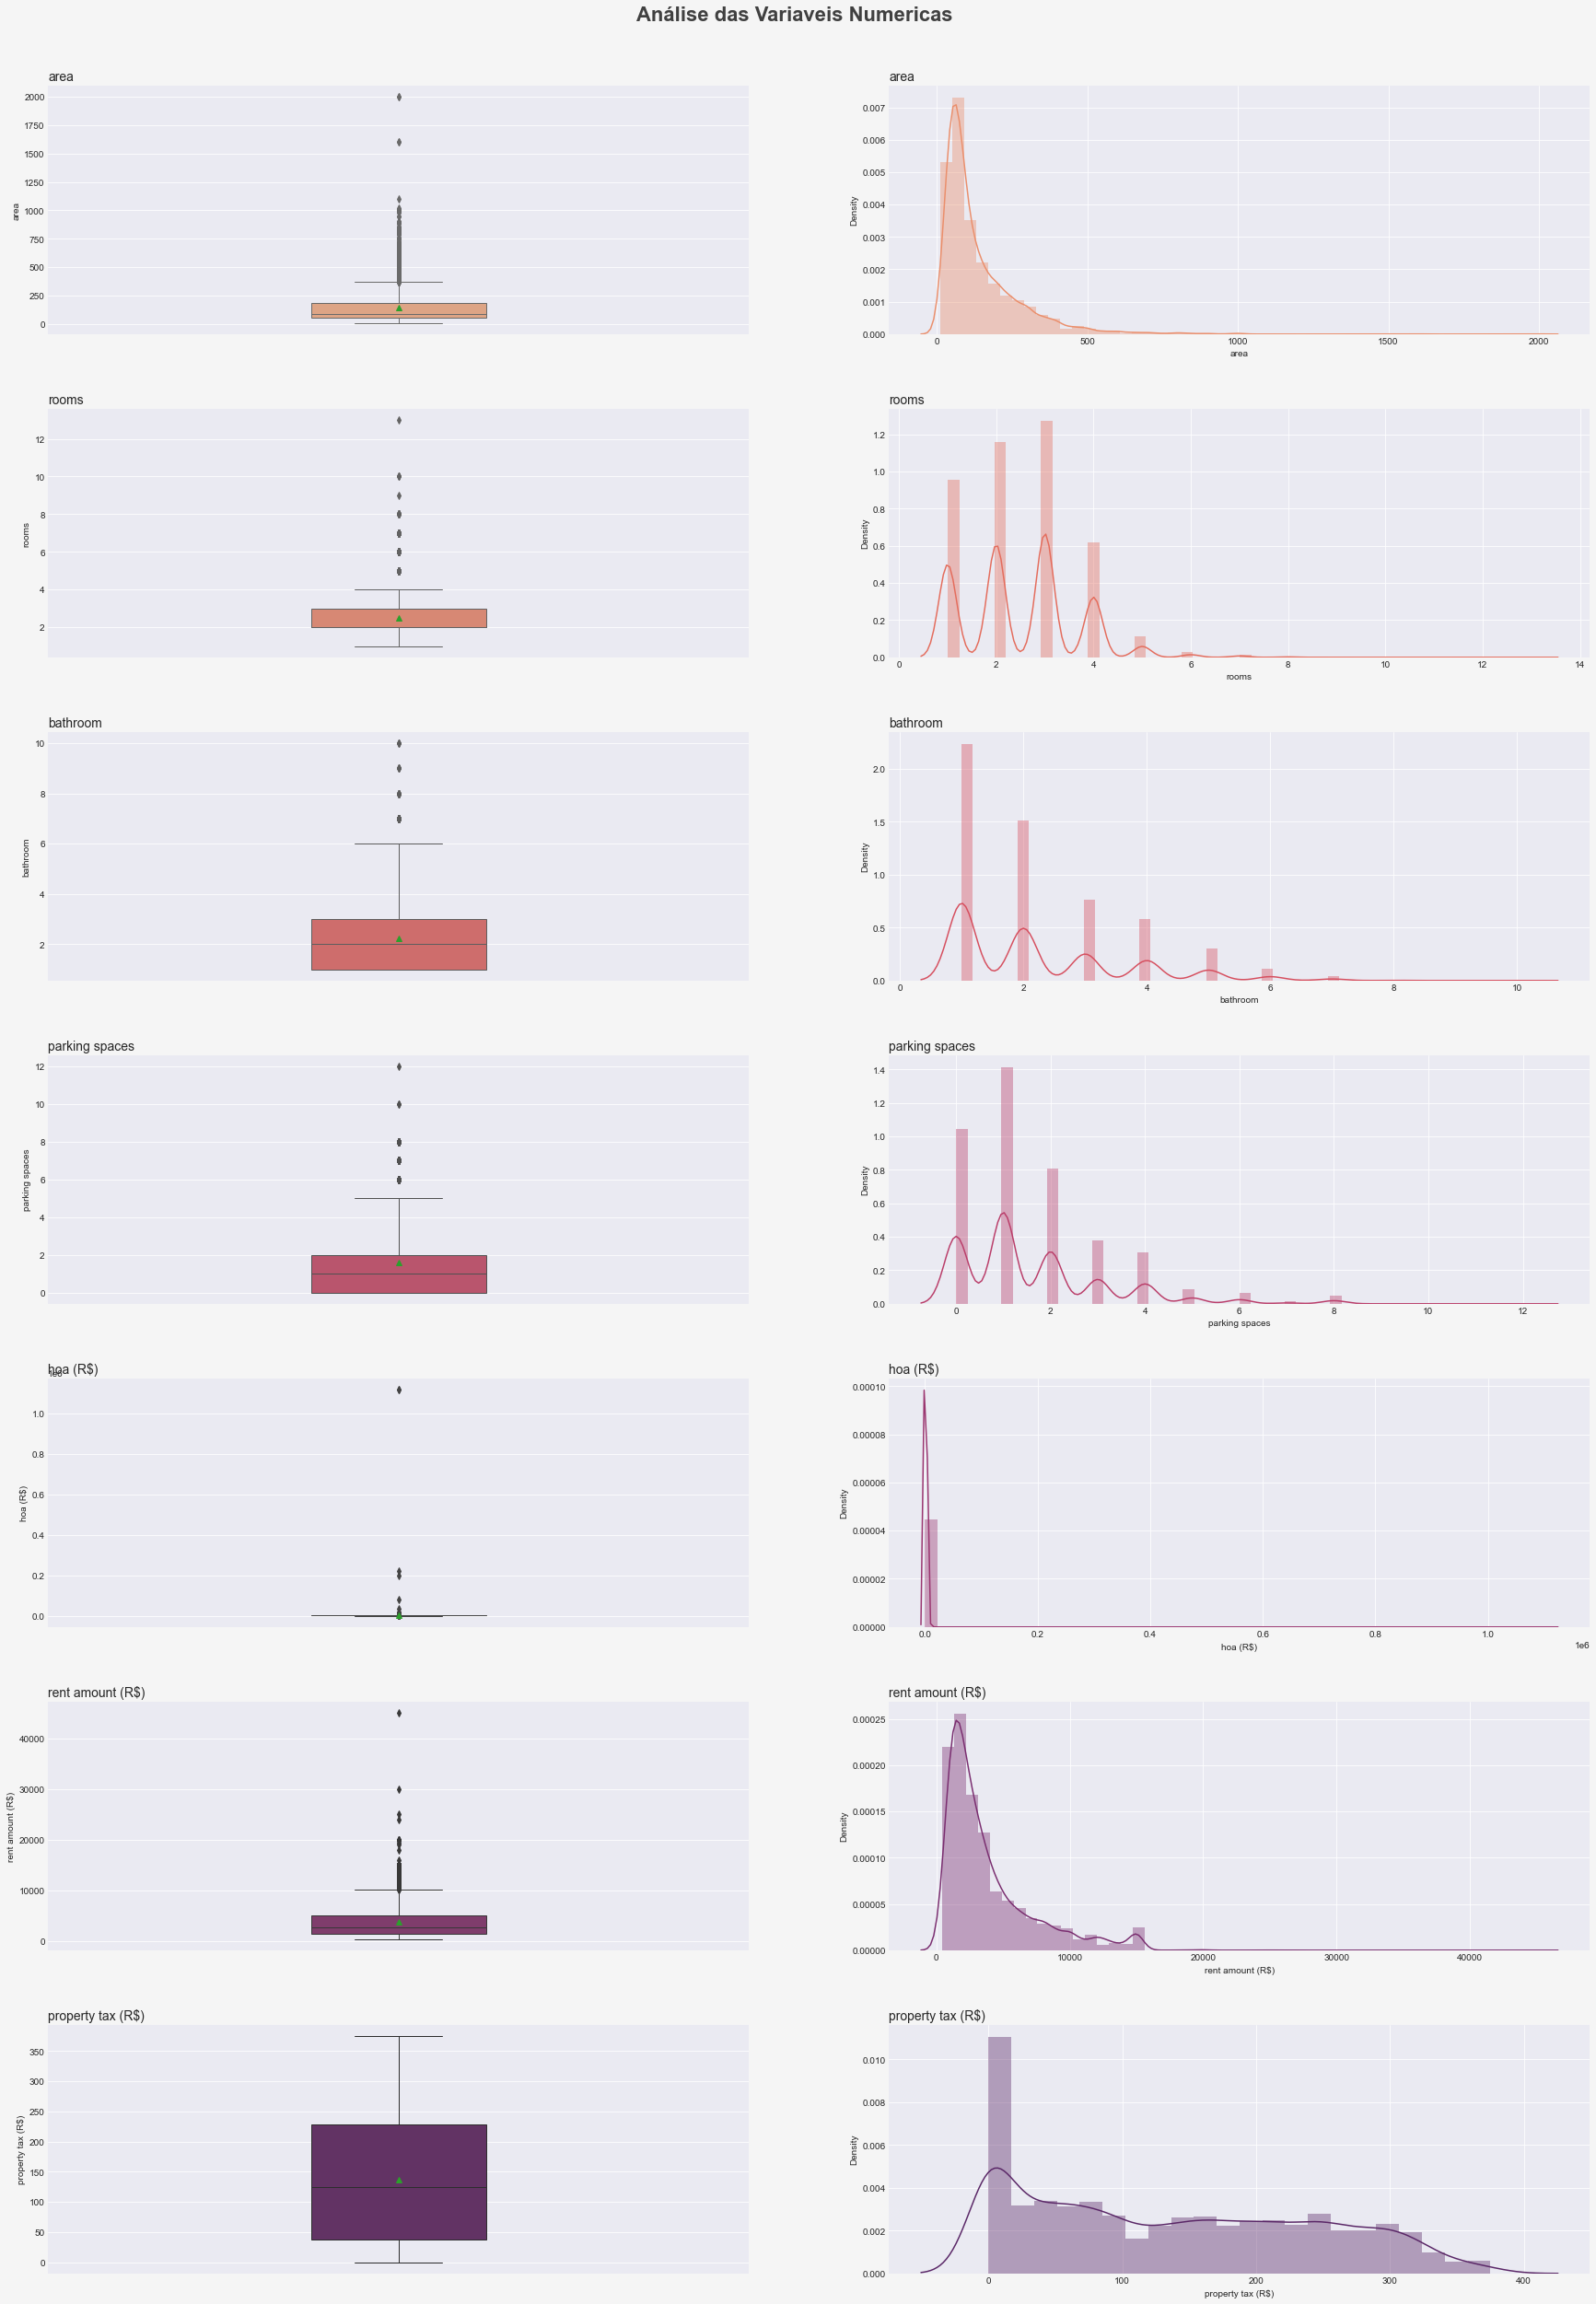

In [135]:
# Fazendo um grid de gráficos
# BoxPlot
# Tamanho 
Figura, Eixo = plt.subplots(figsize=(30,40))

# Cor de fundo
cor_fundo = '#f5f5f5'

Figura.set_facecolor(cor_fundo)

# Paleta de cores para os graficos
paleta_cores = sns.color_palette('flare', len(colunas_numericas) * 2)

# Titulo
plt.suptitle('Análise das Variaveis Numericas', fontsize=22, color='#404040', fontweight=600)

linhas = len(colunas_numericas) # Todas as Infos Numericas
colunas = 2 # Bloxplot / Distplot
posicao = 1 # Posição Inicial do Grid

for coluna in colunas_numericas:
    
    # Plot do Boxplot
    # Plot no grid
    plt.subplot( linhas, colunas, posicao)
    
    # Titulo
    plt.title(f'{coluna}', loc='left', fontsize=14, fontweight=200)
    
    # Boxplot
    sns.boxplot(data=df_1, y=coluna, showmeans=True, saturation=0.75, 
                linewidth=1, color=paleta_cores[posicao-1], width=0.25)
    
    # Mudar a posicao
    posicao = posicao + 1
    
    
    # Plot do Distplot
    # Plot no grid
    plt.subplot(linhas, colunas, posicao)
    
    # Titulo
    plt.title(f'{coluna}', loc='left', fontsize=14, fontweight=200)
    
    # Distplot
    sns.distplot(df_1[coluna], color=paleta_cores[posicao-1])
    
    # Mudar a posicao
    posicao = posicao + 1
    
# Ajuste de Grid
plt.subplots_adjust(top=0.95, hspace=0.3)

In [ ]:
# Testando algumas ideias

In [117]:
df_1.columns

Index(['city', 'area', 'rooms', 'bathroom', 'parking spaces', 'floor',
       'animal', 'furniture', 'hoa (R$)', 'rent amount (R$)',
       'property tax (R$)'],
      dtype='object')

In [118]:
# Consertando Outlier no campo area
for i in df_1.loc[df_1['area'] > 10000].index:
    df_1.iloc[i,1] = df_1['area'].mean()

In [133]:
# Consertando Outlier no campo area
for i in df_1.loc[df_1['property tax (R$)'] > df['property tax (R$)'].describe()[6]].index:
    df_1.iloc[i,10] = df_1['property tax (R$)'].mean()
    #= df_1['property tax (R$)'].mean()

In [123]:
df_1.loc[df['property tax (R$)'] > 300000]

,city,area,rooms,bathroom,parking spaces,floor,animal,furniture,hoa (R$),rent amount (R$),property tax (R$)
6645,São Paulo,42.0,1,2,1,6,not acept,not furnished,690,2500,366.704358


In [132]:
df['property tax (R$)'].describe()[6]

375.0

In [61]:
df_1['area'].mean()

149.21791994014217

In [134]:
df_1['property tax (R$)'].describe()

count    10692.000000
mean       136.623030
std        107.629177
min          0.000000
25%         38.000000
50%        125.000000
75%        227.915125
max        375.000000
Name: property tax (R$), dtype: float64

In [ ]:
# Fim - Testando algumas Ideias